#Aula 01 - Entendendo a dificuldade do aprendizado não-supervisionado
#Aula 02 - Obtendo os clusters

In [22]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

df = pd.read_csv('CC GENERAL.csv')
print("O dataframe possui", df.shape[0], "amostras e ", df.shape[1], "atributos")
df.head()

O dataframe possui 8950 amostras e  18 atributos


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [23]:
df.drop(columns=['CUST_ID', 'TENURE'], inplace = True)
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [24]:
df.fillna(df.median(), inplace = True)

In [25]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

values = Normalizer().fit_transform(df.values)
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

#Aula 03 - Entendendo os critérios e métricas de validação

In [26]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.36419963359840335

#Aula 04 - Entendendo e Calculando o Índice Davies-Bouldin

In [27]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.077090533199074


In [28]:
calinks = metrics.calinski_harabasz_score(values, labels)
calinks

3431.5947301749834

In [29]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters= n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinks = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinks

In [30]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32724682375708775 1.3095668455596414 3526.462544783991


In [31]:
s5, dbs5, calinski5 = clustering_algorithm(5, values)
print(s5, dbs5, calinski5)

0.3644183078877723 1.0760267630682154 3431.784426013862


In [32]:
s10, dbs10, calinski10 = clustering_algorithm(50, values)
print(s10, dbs10, calinski10)

0.23568920544566327 1.2204621505474689 1611.0387822610146


In [34]:
df.count()
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s5, dbs5, calinski5)

0.039664964008764014 3.476835891874841 301.4983434542162
0.3644183078877723 1.0760267630682154 3431.784426013862


In [35]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36892760732667484 1.055833259748491 1204.100909435797
0.3538037064965953 1.1394936582652302 1194.948634553892
0.36704188760608253 1.0984932613776763 1167.5309516804


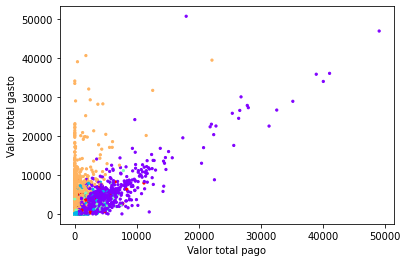

In [36]:
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'],c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

In [37]:
import seaborn as sns
df["cluster"] = labels
sns.pairplot(df[0:], hue="cluster")

Output hidden; open in https://colab.research.google.com to view.

In [38]:
df.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1544.0  1139.523838  1662.497333   0.000000   210.375599   
1        3280.0   444.756951   847.163608   0.000000    23.365333   
2        2634.0  3046.715782  2481.427171   6.824905  1268.170813   
3        1080.0  1797.736178  1977.851450   0.000000   509.445700   
4         412.0  1983.538016  1854.263092  70.794108  1016.567882   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         552.999450  1369.620675  19043.138560            1544.0  0.927179   
1          83.076265   412.596088   9630.367575            3280.0  0.774222   
2        2180.820529  4241.510992  18495.558550            2634.0  0.964784   
3        1099.666578  2320.763272  14581.459140            1080.0  0.862629   
4        1334.001659  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       523.540210  18621.013310           1544.0  0.278820   
1        ...       249.152357   4483.503862           3280.0  0.246094   
2        ...      1331.273048   8345.641905           2634.0  0.001778   
3        ...       884.718306  21235.065300           1080.0  0.116068   
4        ...      7086.774783  76406.207520            412.0  0.019474   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.367254  0.0  0.0  0.083333  0.545455  1.0  
1        0.346326  0.0  0.0  0.000000  0.444444  1.0  
2        0.023271  0.0  0.0  0.000000  0.000000  0.6  
3        0.186430  0.0  0.0  0.083333  0.142857  1.0  
4        0.090845  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [39]:
centroids = kmeans.cluster_centers_
print(centroids)

In [40]:
max = len(centroids[0])
for i in range(max):
  print(df.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0225
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0229
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0274
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


In [51]:
description = df.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1139.523838  3264.336082    183.603147   4091.133518  3042.524783   
1         444.756951   628.817299    143.547030   5133.931941   814.119817   
2        3046.715782   386.852301   1626.440184   4497.608200   967.516543   
3        1797.736178   466.450972   3286.529010   3985.945567  4667.179193   
4        1983.538016   857.503883    420.107194   2224.029126  1346.296383   

         n_clients  
cluster             
0             1544  
1             3280  
2             2634  
3             1080  
4              412  


CLUSTER 0: Clientes que gastam pouco. Com o maior limite. Bons pagadores.

CLUSTER 1: Clientes que mais gastam. O foco deles é o Saques. Piores pagadores. Maior número de clientes

CLUSTER 2: Clientes que gastam muito com Compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com Saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor número de clientes.

In [53]:
df.groupby("cluster")[["PRC_FULL_PAYMENT"]].describe()

PRC_FULL_PAYMENT                                                    \
                   count      mean       std  min  25%       50%       75%   
cluster                                                                      
0                 1544.0  0.278820  0.367254  0.0  0.0  0.083333  0.545455   
1                 3280.0  0.246094  0.346326  0.0  0.0  0.000000  0.444444   
2                 2634.0  0.001778  0.023271  0.0  0.0  0.000000  0.000000   
3                 1080.0  0.116068  0.186430  0.0  0.0  0.083333  0.142857   
4                  412.0  0.019474  0.090845  0.0  0.0  0.000000  0.000000   

              
         max  
cluster       
0        1.0  
1        1.0  
2        0.6  
3        1.0  
4        1.0